# Import
---

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model 

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.datasets import cifar10

# Data
---

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train, X_test = X_train/255.0, X_test/255.0

X_train.shape

(60000, 28, 28)

In [ ]:
# Data is only 2D!
# Convolution expects H x W x C
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
print(X_train.shape)

(60000, 28, 28, 1)


In [ ]:
# Number of classes
K = len(set(y_train))
print(K)

10


# Model
---

In [ ]:
# Build the model (using functional api)
i = Input(shape=X_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 27s 14ms/step - loss: 0.5226 - accuracy: 0.8074 - val_loss: 0.3995 - val_accuracy: 0.8538
Epoch 2/15
1875/1875 [==============================] - 27s 15ms/step - loss: 0.3636 - accuracy: 0.8640 - val_loss: 0.3526 - val_accuracy: 0.8694
Epoch 3/15
1875/1875 [==============================] - 27s 14ms/step - loss: 0.3149 - accuracy: 0.8820 - val_loss: 0.3286 - val_accuracy: 0.8791
Epoch 4/15
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2804 - accuracy: 0.8937 - val_loss: 0.3001 - val_accuracy: 0.8900
Epoch 5/15
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2548 - accuracy: 0.9037 - val_loss: 0.2940 - val_accuracy: 0.8917
Epoch 6/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2337 - accuracy: 0.9115 - val_loss: 0.2921 - val_accuracy: 0.8949
Epoch 7/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2155 - accuracy: 0.9183 - val_loss: 0.2890 -

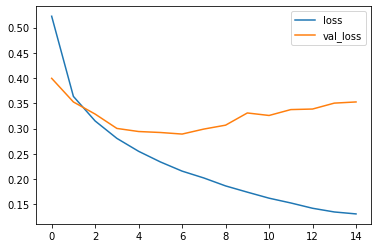

In [ ]:
# Plot loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

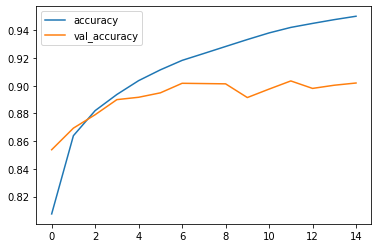

In [ ]:
# Plot accuracy
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [ ]:
# TODO
# Create confusion matrix
p_test = model.predict(X_test)

In [ ]:
# Label mapping
labels = '''T-shirt/top
Trouser
Pullover
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot
'''.split()

In [ ]:
# Show some misclassified examples
